In [108]:
import numpy as np
import matplotlib.pyplot as plt

In [109]:
K = 10
TRIALS = 1000
MEAN_STDDEV = 10
SAMPLE_STDDEV = 10
MEANS = np.random.normal(0, MEAN_STDDEV, 10)
DATA = np.array([np.random.normal(mu, SAMPLE_STDDEV, 1000) for mu in MEANS])
EPSILON = 0.1

In [110]:
print(MEANS)
print(np.mean(DATA, axis=1))

[ 21.20013748   1.80005687   7.99516487  -0.48204753  -4.76087234
  -7.60342497   0.21185643 -10.51991215 -18.92880095  14.35132874]
[ 20.85966738   1.74990624   7.72619953  -0.14538168  -4.90603466
  -7.49878551   0.30921625 -10.48916063 -18.85919585  14.90862227]


In [111]:
class Env:
    def __init__(self, data, step=0):
        self.data = data
        self.length = data.shape[1]
        self.step = step

class Bandit:
    def __init__(self, k, epsilon, env):
        self.k = k
        self.epsilon = epsilon
        self.env = env
        self.counts = [0 for _ in range(k)]
        self.estimates = [0 for _ in range(k)]
        self.reward = 0
        self.avg = [0 for _ in range(env.length)]
    
    def act(self):
        x = np.random.random()
        if x > self.epsilon:
            index = np.argmax(self.estimates)
        else:
            index = np.random.randint(0, self.k)

        x = self.env.data[index, self.env.step]
        n = self.counts[index]
        mean = self.estimates[index]
        self.counts[index] += 1
        self.estimates[index] = (n*mean+x)/(n+1)
        self.reward += x
        if self.env.step == 0:
            self.avg[self.env.step] = x
        else:
            self.avg[self.env.step] = (self.env.step*self.avg[self.env.step-1] + x)/(self.env.step+1)
        self.env.step += 1
        
    def reset(self):
        self.counts = [0 for _ in range(self.k)]
        self.estimates = [0 for _ in range(self.k)]
        self.reward = 0
        self.avg = [0 for _ in range(self.env.length)]
        self.env.step = 0
        
    def run(self):
        for i in range(self.env.length):
            self.act()
        return self.reward

NameError: name 'k' is not defined

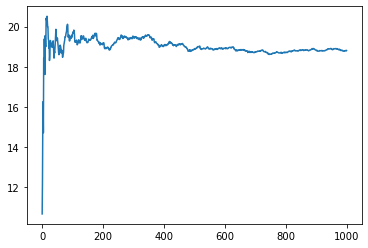

In [112]:
env = Env(DATA)
bandit = Bandit(K, EPSILON, env)
bandit.run()
plt.plot(bandit.avg)
bandit.reset()